In [34]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')  # hide warnings 

import sys
sys.path.append("../")

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import particles.mcmc as mcmc
import particles.state_space_models as ssm
import particles.distributions as dists
from particles.core import SMC
from particles import smc_samplers as ssp
import seaborn
from tqdm import tqdm
import pickle
import os

path = r'C:\Users\dobau\Desktop\3A ENSAE\S1\Hidden Markov Chain and MCMC\Project\res'
load_path = r'C:\Users\dobau\Desktop\3A ENSAE\S1\Kangaroos\Data'
from Utils import *

## Problem

The data are constituted of two independent counts of kangaroos population in New South Wales (Australia). Data are from Knape & De Valpine (2012). We aim to fit different population growth models on the historical data in order to predict the unobserved real population size from the countings.

Some global variables are defined in Utils.ssm, to help the readability of this notebook. For instance `data` (dataframe with the couns), `dt` which is the time difference between the observations, or `y` which puts the data in a correct format to use the particles package developped by N. Chopin.

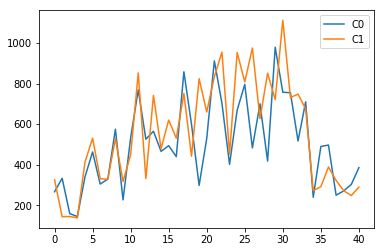

In [35]:
data[['C0','C1']].plot()

C0    4.976734
C1    4.927254
dtype: float64 C0    6.886532
C1    7.013915
dtype: float64 C0    6.115386
C1    6.173569
dtype: float64 C0    0.464843
C1    0.547350
dtype: float64


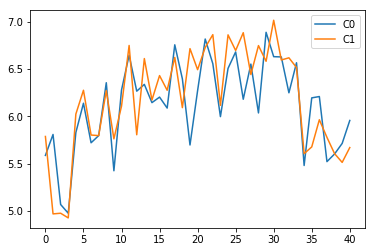

In [36]:
L_data = np.log(data[['C0', 'C1']])
L_data.plot()
print(L_data.min(), L_data.max(), L_data.mean(), L_data.std())

In [37]:
print(mean_N0, std_N0) # Parameters for the initial distribution

296.5 29.5


In [38]:
n_particles = 4000
n_iter = 20000

# Definition of a Logistic Diffusion State-Space Models

The `LogisticDiffusion` state-space model is a model with the following dynamic for the unobserved variable:

$$ \frac{dy_t}{y_t} = (r+\frac{\sigma^2}{2}-b\times y_t)dt + \sigma dW_t$$


For the emission distribution we use a negative binomial distribution with mean $y_t$ and variance $y_t + \tau y_t^2$.

In Knape & De Valpine (2012), three models are considered:
* Model 1: parameters are r, b, $\sigma$
* Model 2: b=0, parameters are r and $\sigma$
* Model 3: r=b=0, the only parameter is $\sigma$

We add a first simple model for the case where $\tau$ is also set to 0 (so the emission distribution because a Poisson of rate $y_t$).

## Tests with all models

### A Random Walk Model with Poisson emission distribution

In [39]:
prior_RWp = {'sigma': dists.Uniform(a=0.,b=10.)}
load_model = True

if load_model:
    pmmh_RWp = pickle.load(open( os.path.join(path,"RWp_model.pkl"), "rb" ))
else:
    p_RWp = dists.StructDist(prior_RWp)
    pmmh_RWp = mcmc.PMMH(ssm_cls=RandomWalk2D_poisson, prior=p_RWp, data=y, Nx=n_particles, niter=n_iter, adaptive=True)
    pmmh_RWp.run()
    #pickle.dump(pmmh_RWp, open(os.path.join(path,"RWp_model.pkl"), "wb" ))

mean square jump distance: 103.09724004980703
posterior loglikelihood: [-1040.91195536 -1040.91195536 -1041.52584849 -1041.52584849
 -1041.41760311]
Acceptance rate: 0.3889694484724236
Last terms of theta chain: [(0.75185588,) (0.75185588,) (0.65394305,)]


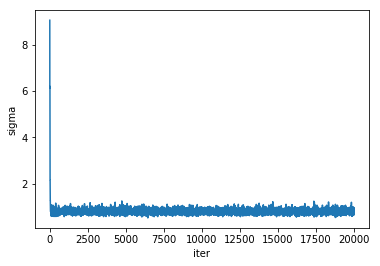

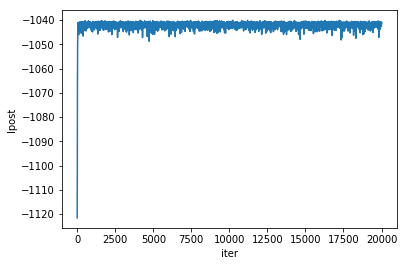

In [40]:
print_metrics(pmmh_RWp)
plot_theta(prior_RWp, pmmh_RWp)

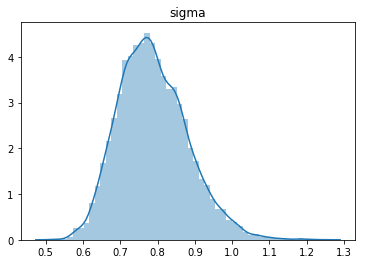

In [41]:
distplot(prior_RWp, pmmh_RWp, 1000)

In [42]:
simulRWp = get_trajectories(N=100, start=1000, model='poisson', pmmh=pmmh_RWp, n_particles=10000)

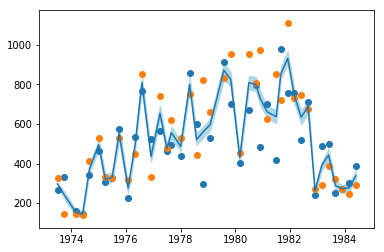

In [43]:
plot_posterior_trajectories(simulRWp)

-1041.7547338345973


{'whiskers': [<matplotlib.lines.Line2D at 0x2cec6801160>,
 'caps': [<matplotlib.lines.Line2D at 0x2cec6801a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cec680dfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec67362b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec67366d8>],
 'means': []}

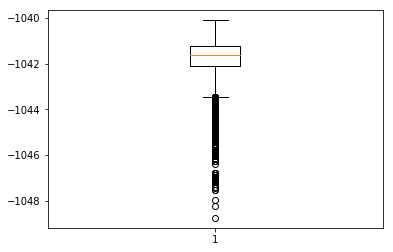

In [45]:
print(pmmh_RWp.chain.lpost[2500:].mean())
plt.boxplot(pmmh_RWp.chain.lpost[2500:])

## Random Walk Model (M3)

In [46]:
prior_RW = {'tau': dists.Uniform(a=0.,b=10.),'sigma': dists.Uniform(a=0.,b=10.)}
p_RW = dists.StructDist(prior_RW)

load_model = True

if load_model:
    pmmh_RW = pickle.load(open( os.path.join(load_path,"RW_model.pkl"), "rb" ))
else:
    pmmh_RW= mcmc.PMMH(ssm_cls=RandomWalk2D, prior=p_RW, data=y, Nx=n_particles, niter=n_iter, adaptive=True)
    pmmh_RW.run()
    # pickle.dump(pmmh_RW, open( os.path.join(path,"RW_model.pkl"), "wb" ) )

mean square jump distance: 327.08341932115593
posterior loglikelihood: [-539.43526736 -539.64174686 -539.7528913  -539.7528913  -539.7528913 ]
Acceptance rate: 0.34130682613652275
Last terms of theta chain: [(0.39279209, 0.0766905) (0.39279209, 0.0766905) (0.39279209, 0.0766905)]


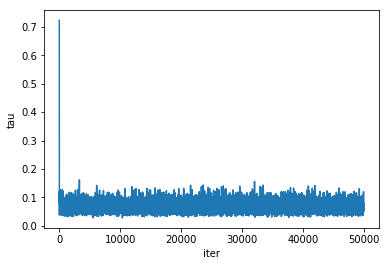

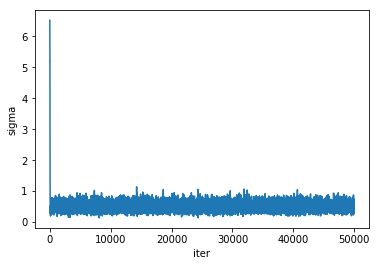

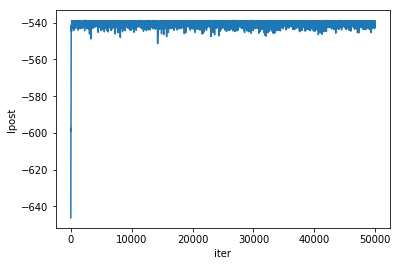

In [47]:
print_metrics(pmmh_RW)
plot_theta(prior_RW,pmmh_RW)

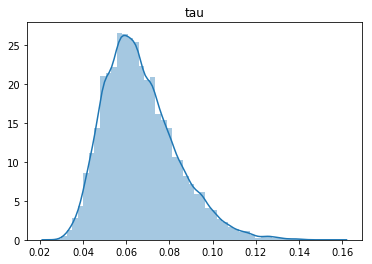

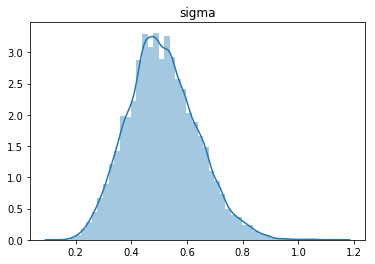

In [14]:
distplot(prior_RW, pmmh_RW, 10000)

In [15]:
simulRW = get_trajectories(N=100, start=1000, model='RW', pmmh=pmmh_RW, n_particles=10000)

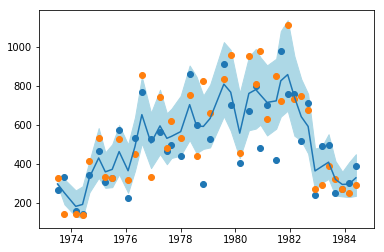

In [16]:
plot_posterior_trajectories(simulRW)

-540.0961113983603


{'whiskers': [<matplotlib.lines.Line2D at 0x2cec6ab1860>,
 'caps': [<matplotlib.lines.Line2D at 0x2cec6ab1668>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cec6ade470>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec6acabe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec6aca908>],
 'means': []}

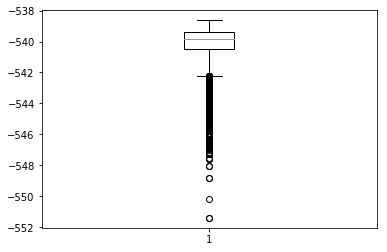

In [52]:
print(pmmh_RW.chain.lpost[2500:].mean())
plt.boxplot(pmmh_RW.chain.lpost[2500:])

## Exponential growth (M2)

In [48]:
prior_Ldrift = {'tau': dists.Uniform(a=0.,b=1.),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}

load_model = True

if load_model:
    pmmh_Ldrift = pickle.load(open( os.path.join(load_path,"Ldrift_model.pkl"), "rb" ))
else:
    p_Ldrift = dists.StructDist(prior_Ldrift)
    pmmh_Ldrift= mcmc.PMMH(ssm_cls=LDPDrift, prior=p_Ldrift, data=y, Nx=n_particles, niter=n_iter, adaptive=True)
    pmmh_Ldrift.run()
    # pickle.dump(pmmh_Ldrift, open( os.path.join(path,"Ldrift_model.pkl"), "wb" ) )

mean square jump distance: 614.8392767816056
posterior loglikelihood: [-543.56520585 -543.56520585 -543.12956423 -543.12956423 -543.07669247]
Acceptance rate: 0.3029660593211864
Last terms of theta chain: [( 0.11525736, 0.60646025, 0.07214217)
 ( 0.11525736, 0.60646025, 0.07214217)
 (-0.17017468, 0.49247744, 0.07185672)]


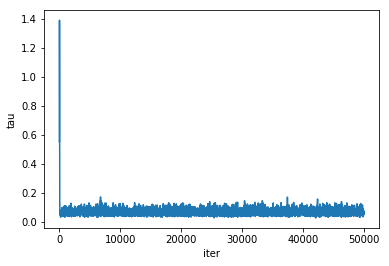

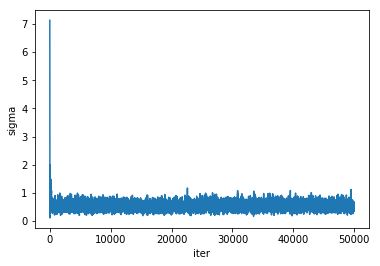

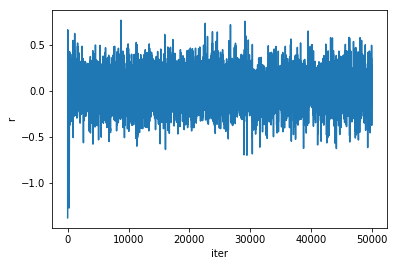

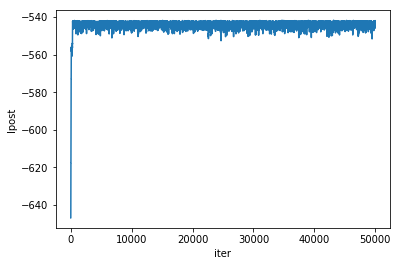

In [49]:
print_metrics(pmmh_Ldrift)
plot_theta(prior_Ldrift,pmmh_Ldrift)

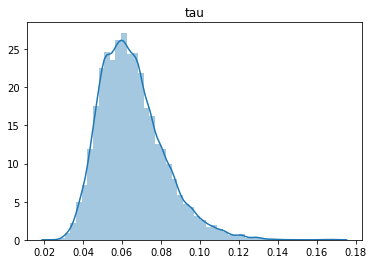

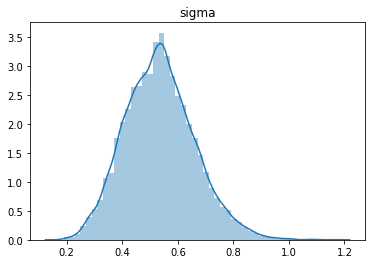

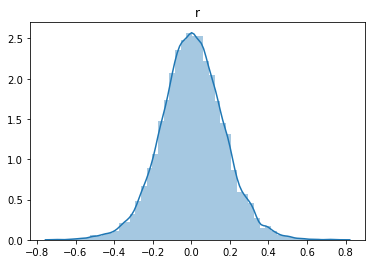

In [50]:
distplot(prior_Ldrift,pmmh_Ldrift,2500)

In [21]:
simulLDrift = get_trajectories(N=100, start=2500, model='LDrift', pmmh=pmmh_Ldrift, n_particles=10000)

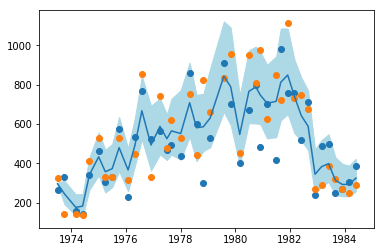

In [22]:
plot_posterior_trajectories(simulLDrift)

-543.5856676855401


{'whiskers': [<matplotlib.lines.Line2D at 0x2cec672d048>,
 'caps': [<matplotlib.lines.Line2D at 0x2cec44a8b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cec672d780>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec44a80f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec44a8b38>],
 'means': []}

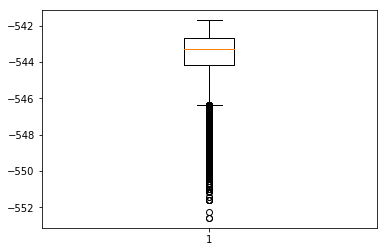

In [51]:
print(pmmh_Ldrift.chain.lpost[2500:].mean())
plt.boxplot(pmmh_Ldrift.chain.lpost[2500:])

## Logistic Diffusion process with drift and restoring force: No Euler discretization

In [64]:
prior_LD = {'tau': dists.Uniform(a=0.,b=1.), 'b': dists.Uniform(a=0., b=1e-2),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}
load_model = True

if load_model:
    pmmh_LD = pickle.load(open( os.path.join(load_path,"LD_model.pkl"), "rb" ))
else:
    p_LD = dists.StructDist(prior_LD)
    pmmh_LD= mcmc.PMMH(ssm_cls=LogisticDiffusion2D, prior=p_LD, data=y, Nx=n_particles, niter=20000, adaptive=True)
    pmmh_LD.run()
    pickle.dump(pmmh_LD, open( os.path.join(path,"LD_model.pkl"), "wb" ) )

mean square jump distance: 250.5477096365952
posterior loglikelihood: [-538.57410064 -538.57410064 -538.57410064 -538.57410064 -538.73922387]
Acceptance rate: 0.24696234811740586
Last terms of theta chain: [(0.00013781,  0.21675215, 0.80438303, 0.06345662)
 (0.00013781,  0.21675215, 0.80438303, 0.06345662)
 (0.00049869, -0.12786717, 0.63196071, 0.08338723)]


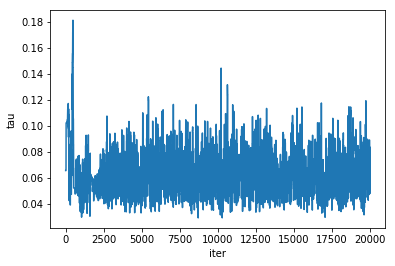

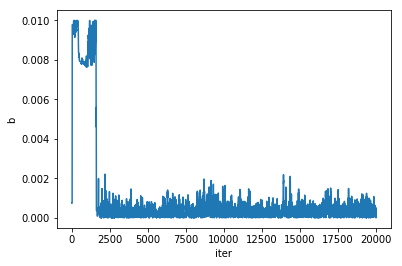

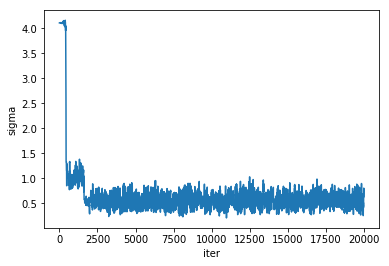

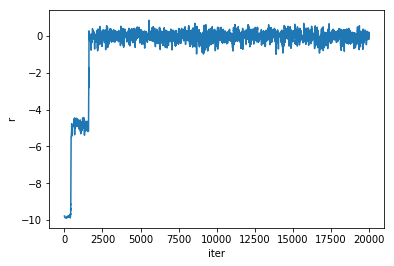

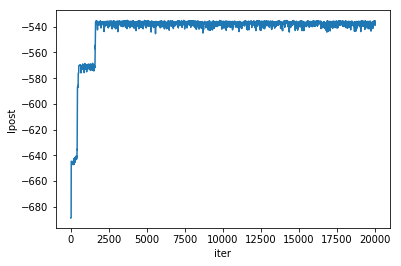

In [65]:
print_metrics(pmmh_LD)
plot_theta(prior_LD,pmmh_LD)

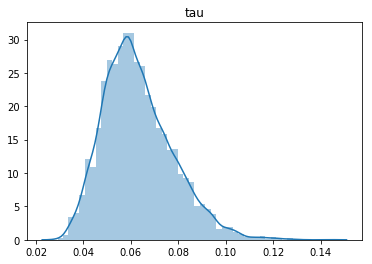

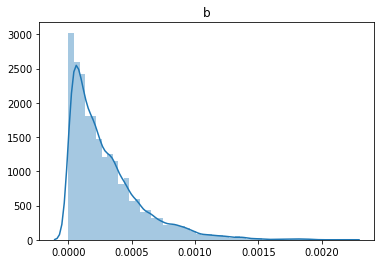

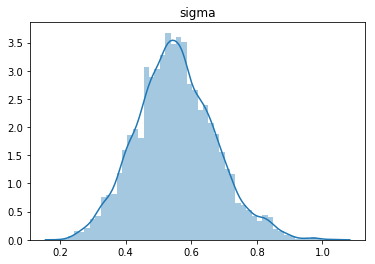

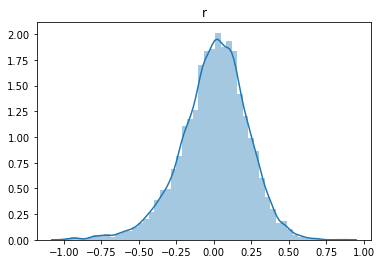

In [66]:
distplot(prior_LD,pmmh_LD, 2500)

In [71]:
simul_LD = get_trajectories(N=100, start=2500, model='LD', pmmh=pmmh_LD, n_particles=10000)

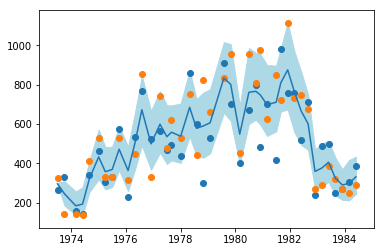

In [73]:
plot_posterior_trajectories(simul_LD)

-537.4610661187205


{'whiskers': [<matplotlib.lines.Line2D at 0x2cec816ccc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cec6bc4518>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cec816cc50>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec6bc4a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec6bfa208>],
 'means': []}

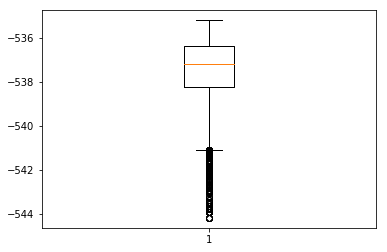

In [68]:
print(pmmh_LD.chain.lpost[10000:].mean())
plt.boxplot(pmmh_LD.chain.lpost[10000:])

## Logistic Diffusion process with Euler Discretization (M1)

### Implementation of the PMCMC

In [55]:
prior_LDEuler = {'tau': dists.Uniform(a=0.,b=1.), 'b': dists.Uniform(a=0., b=1e-2),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}
load_model = True

if load_model:
    pmmh_LDEuler = pickle.load(open( os.path.join(load_path,"LDEuler_model.pkl"), "rb" ))
else:
    p_LDEuler = dists.StructDist(prior_LDEuler)
    pmmh_LDEuler= mcmc.PMMH(ssm_cls=LDEuler, prior=p_LDEuler, data=y, Nx=n_particles, niter=5000, adaptive=True)
    pmmh_LDEuler.run()
    pickle.dump(pmmh_LDEuler, open( os.path.join(path,"LDEuler_model.pkl"), "wb" ) )

mean square jump distance: 41416.3119683789
posterior loglikelihood: [-555.08825855 -555.08825855 -555.08825855 -555.08825855 -555.08825855]
Acceptance rate: 0.253605072101442
Last terms of theta chain: [(0.65767996, 4.03377991, 0.18331463, 0.04343536)
 (0.65767996, 4.03377991, 0.18331463, 0.04343536)
 (0.65767996, 4.03377991, 0.18331463, 0.04343536)]


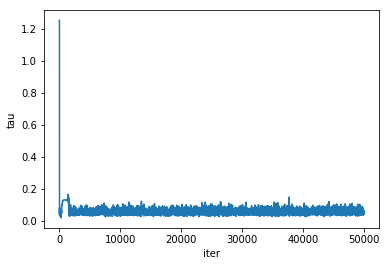

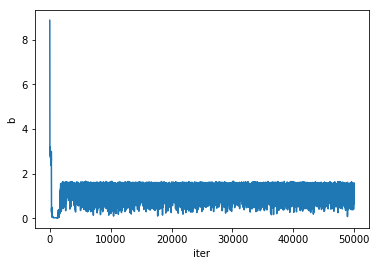

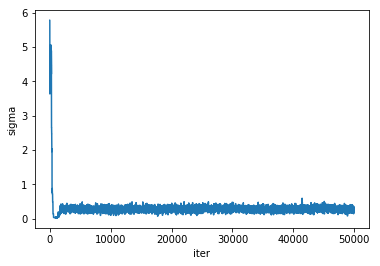

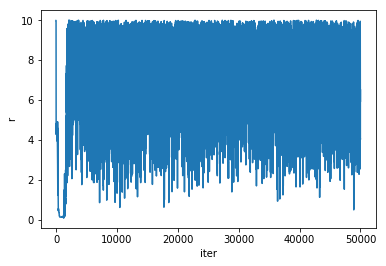

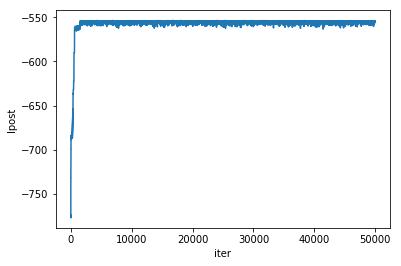

In [56]:
print_metrics(pmmh_LDEuler)
plot_theta(prior_LDEuler,pmmh_LDEuler)

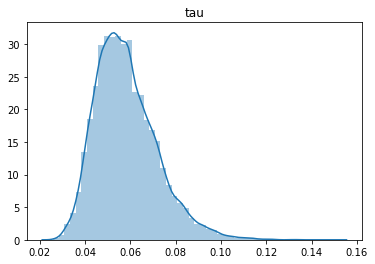

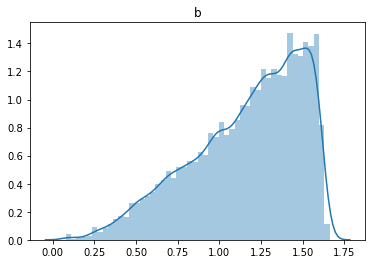

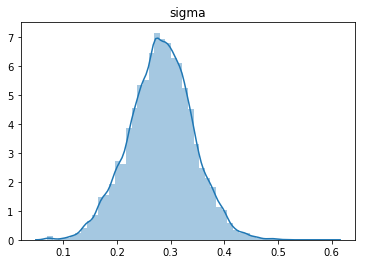

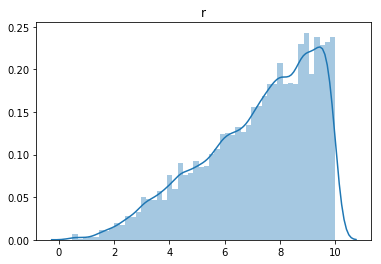

In [29]:
distplot(prior_LDEuler,pmmh_LDEuler, 2500)

The model is too unstable to sample from the posterior distribution.

-555.5245539042821


{'whiskers': [<matplotlib.lines.Line2D at 0x2cec7e80cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cec7e885c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cec7e80b70>],
 'medians': [<matplotlib.lines.Line2D at 0x2cec7e88e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cec7e91278>],
 'means': []}

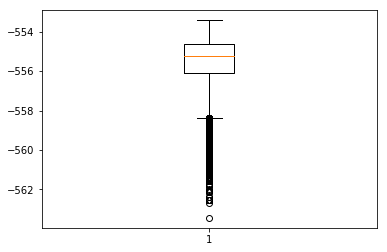

In [62]:
print(pmmh_LDEuler.chain.lpost[10000:].mean())
plt.boxplot(pmmh_LDEuler.chain.lpost[10000:])